# Übung 2 - Bildverarbeitungsoperatoren 

**Name:** Senem Dilli, **Matr.-Nr.:** 210503066
<br>
**Name:** Barış Köse, **Matr.-Nr.:** 190503059
<br>
**Name:** Melik Erdem Özen, **Matr.-Nr.:** 190503002

---

## Bearbeitungszeitraum

**Bearbeitungsbegin:** 18/11/2022
<br>
**Abgabe:** 24/11/2022

---

## Aufgabenbeschreibung

Ziel dieser Übung ist die praktische Anwendung, der in der Vorlesung eingeführten Bildverarbeitungsoperatoren, wie z.B. Filterung im Ortsraum zur globalen Rauschunterdrückung, morphologische Operatoren usw.


**Hinweise zur Abgabe**

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matr.-Nr. aus!
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Bilddatei muss nicht abgegeben werden.


### Viel Erfolg!

### Aufgabenbeschreibung
Der Begriff **Leukämie**, auch Blutkrebs genannt, steht für eine Gruppe von Krebserkrankungen des blutbildenden Systems. Die einzelnen Formen unterscheiden sich bezüglich Häufigkeit, Ursachen, Behandlungsmöglichkeiten und Heilungsaussichten zum Teil stark voneinander. Leukämie geht von den Knochenmarkszellen aus und ist in der Regel durch eine stark erhöhte Zahl weißer Blutkörperchen im Blut gekennzeichnet. 

![BlutBild](Blutbild_LeukaemieVsGesund.jpg)


***Eine Leukämie geht mit Veränderungen im Blutbild einher*** (Bildquelle: Apotheken-umschau)




             

### 1. Aufgabe - Einlesen und Visualisieren eines Leukämie(CLL)-Zellenbildes

Die chronische lymphatische Leukämie (CLL) ist ein niedrigmaligne, in der westlichen Welt die am häufigsten vorkommende Leukämieform. Die Diagnose dieser Erkrankung erfolgt zunächst im Blutbild. Lesen sie die Datei "leukaemie.jpg" ein, um ein solches Blutbild darzustellen. Visualisieren Sie das eingelesene Bild (verwenden Sie die Funktionen `imshow` und `show`). Konvertieren Sie die .jpg-Datei in ein numpy-array.



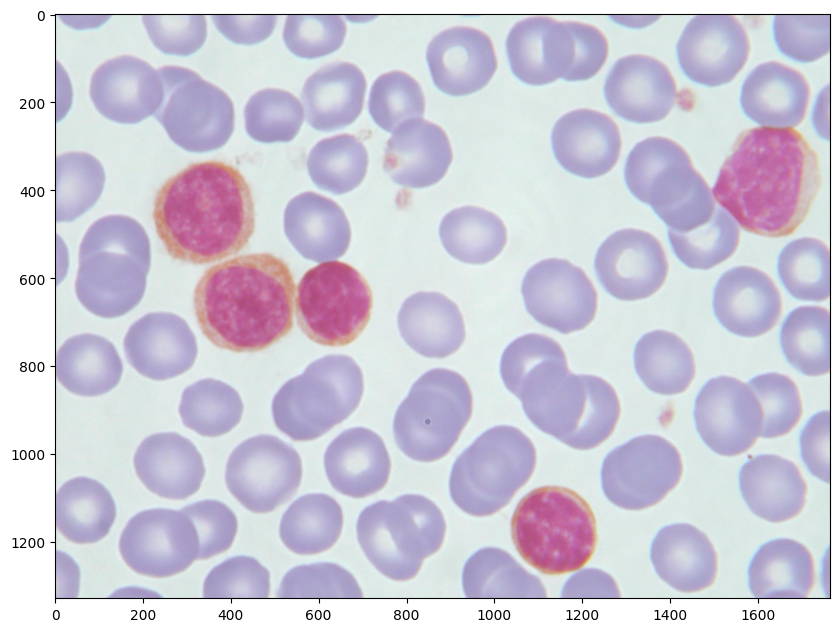

<class 'numpy.ndarray'>
(1329, 1764, 3)


In [1]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

image = Image.open('leukaemie.jpg')
image.show()

#Datei Lesen
image = cv2.imread("leukaemie.jpg")
#Visualisierung
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(image)
 
# <class 'numpy.ndarray'>
print(type(numpydata))
 
# shape
print(numpydata.shape)


### 2. Aufgabe - Orts- und Frequenzraumanalyse sowie Filterung des Zellbildes

Im Rahmen dieser Aufgabe sollen Sie Ihre Kenntnisse mit globalen Bildstörungen einsetzen, indem Sie auf diese Störungen zurückzuführende Veränderungen im Frequenzraum erkennen und eliminieren. Um solch eine spektrale Bildanalyse durchführen zu können, müssen Sie mittels Fourierttrasformation vom Ortsraum in den Frequenzraum wechseln. Dazu können Sie aus `numpy` die ensprechende mathematische Funktion namens `fft` benutzen. Ebenfalls lässt sich die `fft` Funktion der `cv2` library einsetzen und ist ggf. bis zu 3x performanter. 

**2.1: Globale Bildstörungen erzeugen, Orts- sowie Frequenzraum darstellen**
- Erzeugen Sie im ersten Schritt globale Bildstörungen (Rauschen). Globale Bildstörung kann z.B. Gauss-Rauschen, Salz-Pfeffer-Rauschen o.ä. periodische Bildartefakte sein (vgl. VL-Folien).
- Wenden Sie das erzeugte Rauschen auf das Bild `leukaemie.jpg` an. 
- Wenden Sie die Fouriertransformation sowohl auf das Grauwertbild als auch auf die verrauschte Kopie des Grauwertbildes an.
- Visualisieren Sie beide Bilder mit ihren jeweiligen Frequenzspektren dar (`subplot` mit 2x2-Raster)


**2.2: Histogramme erzeugen**
- Visualisieren Sie die Histogramme des verrauschten sowie des unverarbeiteten Originalbildes, um die Grauwertverteilungen darzustellen.


**2.3: Filterung im Frequenzraum**
- Führen Sie eine Filterung des verrauschten Bildes (im Frequenzraum!) durch, um die zuvor (in der Teilaufgabe 2.1) erzeugten Störungen wieder weitesgehend zu eliminieren
- Visualisieren Sie das gefilterte Bild sowie das dazugehörige Frequenzspektrum nebeneinander dar.

**2.4: Erläuterung der verwendeten Methoden**
- Erläutern Sie stichpunktartig die Funktionsweise der verwendeten Funktionen zur Rauscherzeugung sowie Rauschunterdrückung.
- Erläutern Sie stichpunktartig die Funktionsweise der eingesetzten FFT sowie iFFT! 


**Hinweise:**
- Beim Einlesen des Bildes (z.B. mit `imread` aus der Bibliothek `skimage`) den Parameter `as_gray` gleich 'True' setzen und mit diesem Graubild weiterarbeiten. Beim plotten müssen Sie ggf. dennoch `cmap='gray'` setzen.
- Falls Sie Gauss-Rauschen erzeugen, dann sollte der Sigma-Wert nicht das Maximum von 1.0 überschreiten - denn es reicht ein leichtes Rauschen, das zusätzlich zum Ortsraum auch im Frequenzraum erkennbar ist.
- Vor der Anwendung der Fouriertransformation müssen Sie die Bildgröße anpassen, da das Originalbild nicht quadratisch ist (vgl. VL-Folien zur FFT: Anzahl Zeilen/Spalten muss identisch sein!)
- Führen Sie die Filterung im Frequenzraum durch, weil es sich um eine globale Bildstörung handelt! Überlegen Sie vorher, was der Filter bewirken soll (glätten? Kanten hervorheben?, ..) und probieren Sie unterschiedliche Filterkerngrößen (3x3, 5x5,7x7) aus! Und denken Sie an die anschließende Rücktransformation!



ValueError: the input array must have size 3 along `channel_axis`, got (1329, 1764)

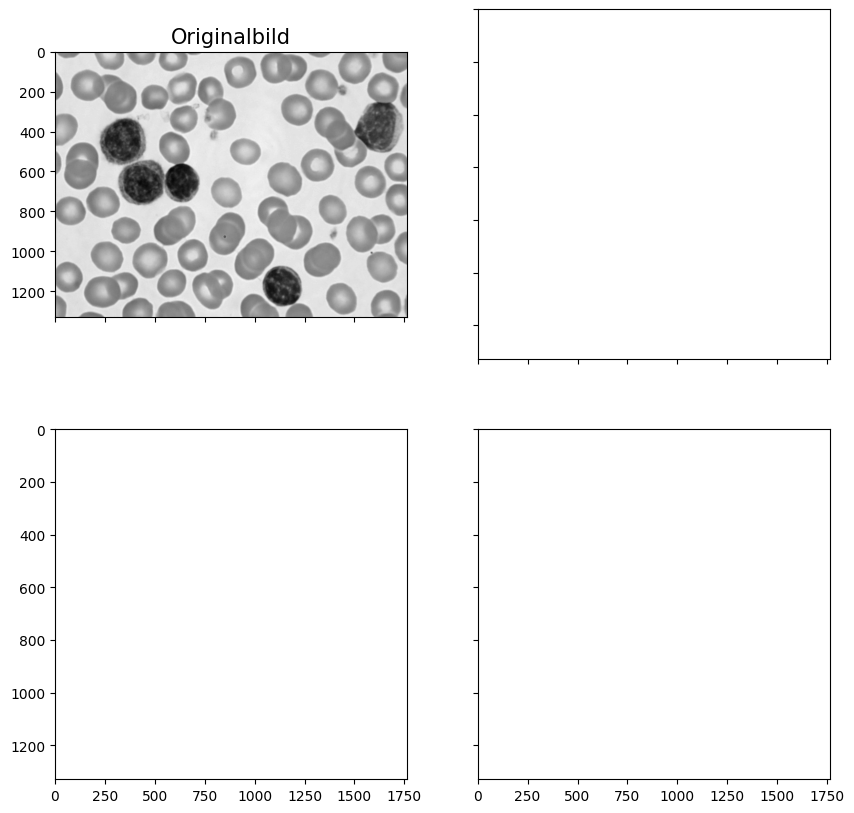

In [3]:
# Aufgabe 2.1
# Senem

import cv2
import numpy as np
import skimage
import matplotlib.pyplot as plt

# Originalbild
img = cv2.imread('leukaemie.jpg',0)
img = img/255

# Leeres Bild
x,y = img.shape
noisy_image = np.zeros((x,y), dtype=np.float32)

# Salz- und Pfeffermenge
pepper = 0.1
salt = 0.95

# Erstellung von Salz- und Pfefferrauschen Bilder    
for i in range(x):
    for j in range(y):
        rdn = np.random.random()
        if rdn < pepper:
            noisy_image[i][j] = 0
        elif rdn > salt:
            noisy_image[i][j] = 1
        else:
            noisy_image[i][j] = img[i][j]

# Fouriertransformation -> Frequenzspektrum
# Berechnung von der 2-dimensionalen diskreten Fourier-Transformation
f = np.fft.fft2(img)
# Verschiebung der Transformationen und ihrer Frequenzen, um die Null-Frequenz-Komponenten in die Mitte zu legen
fshift = np.fft.fftshift(f)
freq_spektrum_original = 20*np.log(np.abs(fshift)).astype(np.uint8)

f_noisy = np.fft.fft2(noisy_image)
fshift_noisy = np.fft.fftshift(f_noisy)
freq_spektrum_noisyImg = 20*np.log(np.abs(fshift_noisy)).astype(np.uint8)

# Visualisierung
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Originalbild', fontsize=15)

gray_freqSpec_original = skimage.color.rgb2gray(freq_spektrum_original) #Graubild erzeugen
ax[1].imshow(gray_freqSpec_original, cmap=plt.cm.gray)
ax[1].set_title('Frequenzspektrum des Originalbildes', fontsize=15)

ax[2].imshow(noisy_image, cmap=plt.cm.gray)
ax[2].set_title('Salz-Pfeffer-Rauschen', fontsize=15)

gray_freqSpec_noisy = skimage.color.rgb2gray(freq_spektrum_noisyImg) #Graubild erzeugen
ax[3].imshow(gray_freqSpec_noisy, cmap=plt.cm.gray)
ax[3].set_title('Frequenzspektrum des verrauschten Bildes', fontsize=15)

for a in ax.ravel():
   a.axis('off')
fig.tight_layout()


Text(0, 0.5, 'Frequency')

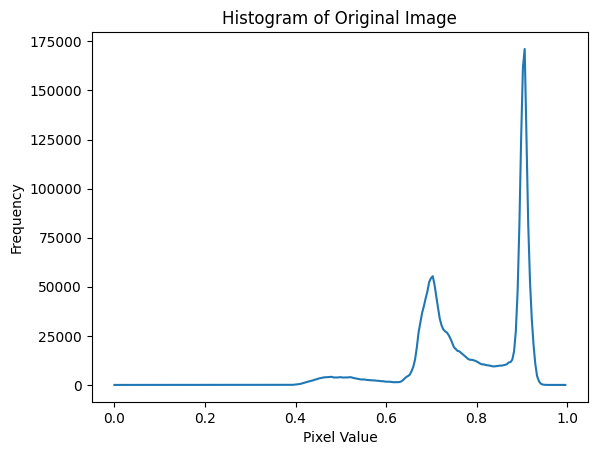

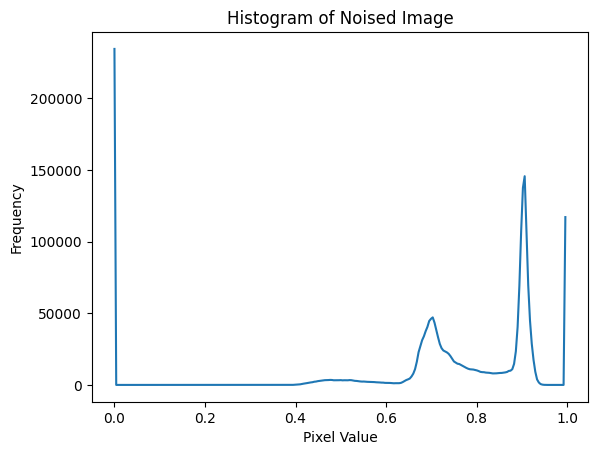

In [5]:
# Aufgabe 2.2
# Barış

# Histogramm des Originalbildes erstellen
hist, bins = np.histogram(img, bins=256, range=(0, 1))
plt.figure()
plt.plot(bins[:-1], hist)
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Histogramm des verrauschten Bildes erstellen
hist, bins = np.histogram(noisy_image, bins=256, range=(0, 1))
plt.figure()
plt.plot(bins[:-1], hist)
plt.title('Histogram of Noised Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')


NameError: name 'LogNorm' is not defined

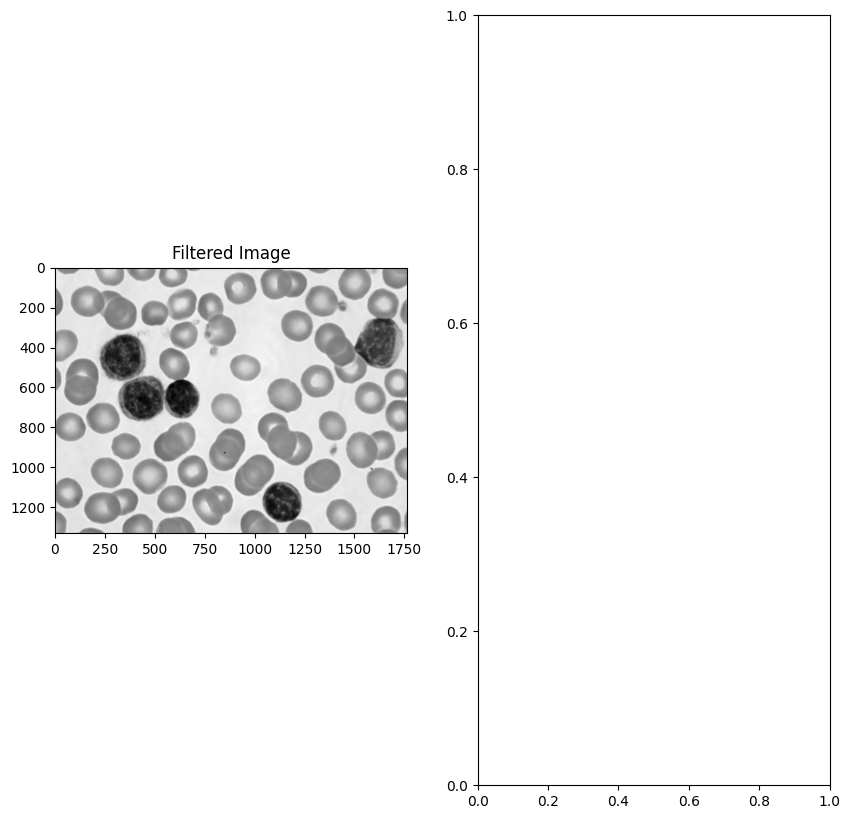

In [6]:
# Aufgabe 2.3
# Barış

# Median Blur Funktion
new_image = cv2.medianBlur(gray_freqSpec_noisy,5)

f2 = np.fft.fft2(new_image)
fshift2 = np.fft.fftshift(f2)
freq_spektrum_original2 = 20*np.log(np.abs(fshift2)).astype(np.uint8)

fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

gray_freqSpec_original2 = skimage.color.rgb2gray(freq_spektrum_original2) #Graubild erzeugen
ax[0].imshow(gray_freqSpec_original2, cmap=plt.cm.gray)
ax[0].set_title('Denoised-Frequenzspektrum', fontsize=15)

ax[1].imshow(gray_freqSpec_original, cmap=plt.cm.gray)
ax[1].set_title('Frequenzspektrum des Originalbildes', fontsize=15)


for a in ax.ravel():
   a.axis('off')
fig.tight_layout()


### 3. Morphologische Operationen
 
**3.1 Strukturen verkleinern/vergrößern, um schmale Verbindungen zu lösen/Lücken zu schließen**

Führen Sie folgende morphologische Operationen mit dem Originalbild `leukaemie.jpg` durch:
    - Erosion
    - Dilation
    - Opening
    - Closing
 
Hierbei können Sie sowohl `Skimage`- als auch `CV2`-Bibliotheken benutzen. Stellen Sie Ihre Ergebnisse in einem 2x2-subplot dar. 


**3.2 Merkmalsextraktion**

- Welche, der in der Teilaufgabe 3.1 eingesetzten morphologischen Operationen ist am besten geeignet, falls die Anzahl der Zellen im Bild gezählt werden soll? 

- Zählen Sie ALLE Zellen in diesem Bild, nachdem sie eine "passende" morphologische Operation durchgeführt haben. Tipp: Zur Detektion von Kreisen/Ellipsen können Sie die "Hough-Transformation" anwenden.

**3.3. Bonus**
Zählen Sie NUR die lila gefärbten Leukozyten.
 

Text(0.5, 1.0, 'Closing')

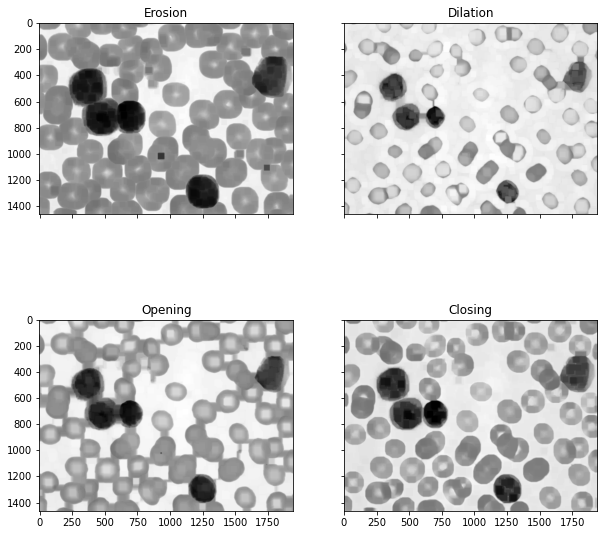

In [ ]:
# Aufgabe 3.1
# Melik

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('leukaemie.jpg', 0)

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5, 5), np.uint8)

# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(img, kernel, iterations=10)
img_dilation = cv2.dilate(img, kernel, iterations=10)
closing = cv2.dilate(img_erosion, kernel, iterations=10)
opening = cv2.erode(img_dilation, kernel, iterations=10)


fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0,0].imshow(img_erosion, cmap='gray')
axs[0,0].set_title('Eroded(Dilation)')
axs[0,1].imshow(img_dilation, cmap='gray')
axs[0,1].set_title('Dilated(Erosion)')
axs[1,0].imshow(opening, cmap='gray')
axs[1,0].set_title('Opening')
axs[1,1].imshow(closing, cmap='gray')
axs[1,1].set_title('Closing')


[INFO] 140 unique contours found


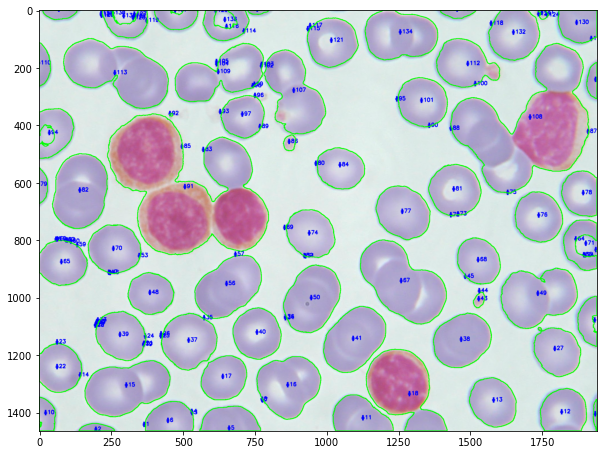

In [ ]:
# Aufgabe 3.2
# Senem

import numpy as np
import imutils
import cv2

# Datei Lesen
image = cv2.imread('leukaemie.jpg') 

# Entrauschung des Bildes
dst = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)
rgb_image = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# Median-Blur Funktion
new_image = cv2.medianBlur(rgb_image,5)

# HSV-Farbraum
hsv_image = cv2.cvtColor(new_image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_image)

# Schwellenwert des H-Kanal-Bildes für Binärbild
ret,th1=cv2.threshold(h,180,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Morphologischen Operation zur Reduzierenung
kernel = np.ones((5,5), dtype = "uint8")/9
bilateral = cv2.bilateralFilter(th1, 9 , 75, 75)
# Erodierfunktion
erosion = cv2.erode(bilateral, kernel, iterations = 6)

# So ermitteln Sie die Anzahl der Objekte im Bild und zeichnen die Kontur
# Konturen im mit Schwellenwerten versehenen Bild finden
cnts = cv2.findContours(th1.copy(), cv2.RETR_EXTERNAL,
 cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))

# Schleife über die Konturen
for (i, c) in enumerate(cnts):
 # die Kontur zeichnen
 ((x, y), _) = cv2.minEnclosingCircle(c)
 cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)),
  cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
 cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

# Visualisierung
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

**4. BONUSAUFGABE:** Detektieren Sie im folgenden Bild **alle Pfeile**. Treffen Sie die Entscheidung, ob die Pfeilspitze nach **rechts** oder nach **links** zeigt. 

![pfeile.png](attachment:pfeile.png)